# STAT 201 Group 47 Project
## Statistical Inference on Methamphetamine Use Across Users
#### **Authors:** Nour Abdelfattah, Muhammad Shahbaz Murtaza, Sky Yun and Emiliano Hernández Castillo
#### **Group:** 47



## Possible Dataset

- **Customer Shopping Trends Dataset** https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
- **Top Spotify Songs in 73 Countries** https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated
- **Drug Consumption**
https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci
## Instructions (Copied From STAT 201 Course Page)
Each group is expected to prepare a written proposal within 500 words (about 1 page) that identifies the dataset they plan to work on, as well as the question they would like to answer using that dataset for their group project. The proposal should be done in a Jupyter notebook, and then submitted both as an .html file (File → Download As → HTML) and an .ipynb file that is reproducible (i.e. works and runs without any additional files).

Only one member of your team needs to submit. You must submit two files:

the source Jupyter notebook (.ipynb file)
the rendered final document (.html file)
Each proposal should include the following sections:

- Title
- Introduction
- Preliminary Results
- Methods: Plan
- References

### Introduction
Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent

### Preliminary Results

- **Make sure to set a seed whenever we are sampling**
- Demonstrate that the dataset can be read from the web into R. DONE
- Clean and wrangle your data into a tidy format. DONE
- Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
- Be sure to not print output that takes up a lot of screen space.

### Methods: Plan
The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

### References
At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

assigned to review a different group’s proposal. This allows your group to collectively see a larger variety of proposals.)

submit that to canvas. There is no page limit. The teaching team will deliver the feedback to your reviewee.)

communicated effectively. When possible, provide suggestions for improvement. If everything looks good to you, say why it looks good.) comment: <> (- What part of the proposal is the most effective, and why?) comment: <> (- What part of the proposal is the least effective, and why? Provide a suggestion for improvement.) comment: <> (- Provide feedback on English, spelling, and grammar, if applicable.)

the composition of your submission, reasoning (70%) evaluates your feedback, and writing (20%) evaluates your English, spelling, and grammar.)

## 2- Preliminary Results

### 2.1- Loading Libraries 

In [38]:
# Library Dependencies
library(ggplot2)   #Helps present data visually
library(tidyverse) #Helps transform and present data
library(infer)     #Allows the use of infer workflow for statistical inference

install.packages('ggcorrplot')
library(ggcorrplot)  #Allows to render correlation plot

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 2.2- Reading Data Set to R and Wrangling

In [74]:
url <- "https://raw.githubusercontent.com/yun-sky/stat-201-project/main/.ipynb_checkpoints/Drug_Consumption-checkpoint.csv"

#Opening Drug_Consumption data from GitHub repository url 
all_drug_data <- read.csv(url) 


#Wrangling data by selecting desired variables for inference
drug_data <- all_drug_data %>%
    select(Impulsive, Meth) %>%
    mutate(used = Meth %in% c("CL1", "CL2", "CL3", "CL4", "CL5", "CL6"))


#Observing drug use frequency
table(drug_data$used)

#Head of wrangled data
head(drug_data)


FALSE  TRUE 
 1428   456 

,Impulsive,Meth,used
,<dbl>,<chr>,<lgl>
1,-0.71126,CL3,TRUE
2,-1.37983,CL0,FALSE
3,-1.37983,CL0,FALSE
4,-0.21712,CL0,FALSE
5,-1.37983,CL0,FALSE
6,-0.21712,CL0,FALSE


### 2.3- Exploratory Analysis

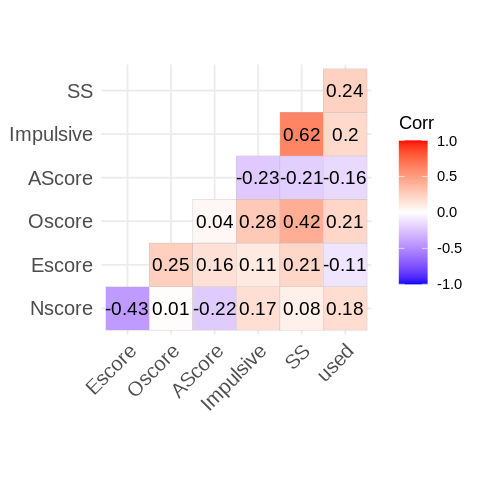

In [77]:
###ADDED THIS BUT TBH DONT LOVE IT, PROBABLY WILL TAKE IT OUT UNLESS ANYONE WANTS IT, NOW THAT I THINK ABOUT IT THIS MIGHT
#### BE RENDERED USELESS WITH THE OTHER PLOT WHICH EXPLAINS THE RELATIONSHIP BETTER IN MY OPINION 
options(repr.plot.width = 4, repr.plot.height = 4)

#Selecting relative quantitaive and qualitative columns to observe correlations between 
binary_drug_data<- all_drug_data|>
    select(Nscore, Escore, Oscore, AScore, Impulsive, SS, Meth)|>
    mutate(used = Meth %in% c("CL1", "CL2", "CL3", "CL4", "CL5", "CL6"))|>
    mutate(used = ifelse(used == "TRUE",1,0))|>
    select(-Meth)|>
    cor(use="complete.obs") 

#Plotting Correlation Plot using ggcorrplot library
ggcorrplot(binary_drug_data, 
           hc.order = FALSE, 
           type = "lower",
           lab = TRUE)


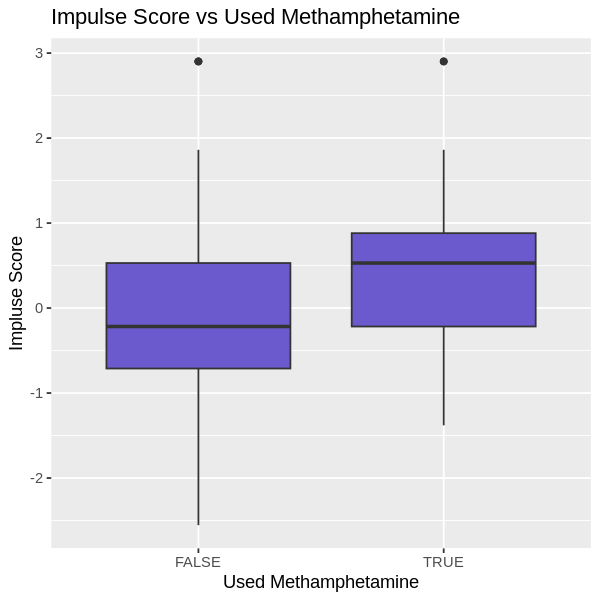

In [76]:
options(repr.plot.width = 5, repr.plot.height =5)

#Creating Box plot to observe Impulse Scores across Drug and Non-Drug Users (Methamphetamine)
ggplot(drug_data, aes(x = used, y = Impulsive)) +
    geom_boxplot(fill = "slateblue") +
    labs(x= "Used Methamphetamine", y= "Impluse Score", title= "Impulse Score vs Used Methamphetamine")
